In [692]:
#Dependcies 

from sklearn import *
from sklearn.model_selection import GroupKFold
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

from sklearn.decomposition import PCA

In [693]:
# Read The DateFrame

df1=pd.read_csv("AddMoreDataToThisCrap.csv")
df2=pd.read_csv("TeamFieldingMLB2023.csv")
df2

,Unnamed: 0,#Fld,RA/G,DefEff,G,GS,CG,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,PLAYOFFS,YEAR
0,Arizona Diamondbacks,53,4.70,0.695,162,1458,1071,12918,5761,4306,1399,56,134,0.990,47,4,1,2023
1,Atlanta Braves,51,4.42,0.685,162,1458,1210,12960,5741,4320,1339,82,134,0.986,15,1,1,2023
2,Baltimore Orioles,50,4.19,0.696,162,1458,991,13083,5876,4361,1444,71,140,0.988,35,3,1,2023
3,Boston Red Sox,56,4.79,0.677,162,1458,1059,12870,5821,4290,1429,102,137,0.982,-15,-1,0,2023
4,Chicago Cubs,48,4.46,0.694,162,1458,1130,12918,5888,4306,1490,92,137,0.984,4,0,0,2023
5,Chicago White Sox,56,5.19,0.685,162,1458,1088,12885,5639,4295,1249,95,117,0.983,-64,-6,0,2023
6,Cincinnati Reds,65,5.07,0.685,162,1458,989,12954,5692,4318,1283,91,125,0.984,-11,-1,0,2023
7,Cleveland Guardians,50,4.30,0.698,162,1458,1127,12996,5833,4332,1418,83,119,0.986,10,1,0,2023
8,Colorado Rockies,57,5.91,0.670,162,1458,1146,12726,5839,4242,1516,81,169,0.986,18,2,0,2023
9,Detroit Tigers,50,4.57,0.699,162,1458,991,12981,5830,4327,1403,100,129,0.983,28,3,0,2023


In [694]:
#Add Range Factor 
df2["Range_Factor"]=(df2["PO"]+df2["A"])/df2["G"]
df2

,Unnamed: 0,#Fld,RA/G,DefEff,G,GS,CG,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,PLAYOFFS,YEAR,Range_Factor
0,Arizona Diamondbacks,53,4.70,0.695,162,1458,1071,12918,5761,4306,1399,56,134,0.990,47,4,1,2023,35.216049
1,Atlanta Braves,51,4.42,0.685,162,1458,1210,12960,5741,4320,1339,82,134,0.986,15,1,1,2023,34.932099
2,Baltimore Orioles,50,4.19,0.696,162,1458,991,13083,5876,4361,1444,71,140,0.988,35,3,1,2023,35.833333
3,Boston Red Sox,56,4.79,0.677,162,1458,1059,12870,5821,4290,1429,102,137,0.982,-15,-1,0,2023,35.302469
4,Chicago Cubs,48,4.46,0.694,162,1458,1130,12918,5888,4306,1490,92,137,0.984,4,0,0,2023,35.777778
5,Chicago White Sox,56,5.19,0.685,162,1458,1088,12885,5639,4295,1249,95,117,0.983,-64,-6,0,2023,34.222222
6,Cincinnati Reds,65,5.07,0.685,162,1458,989,12954,5692,4318,1283,91,125,0.984,-11,-1,0,2023,34.574074
7,Cleveland Guardians,50,4.30,0.698,162,1458,1127,12996,5833,4332,1418,83,119,0.986,10,1,0,2023,35.493827
8,Colorado Rockies,57,5.91,0.670,162,1458,1146,12726,5839,4242,1516,81,169,0.986,18,2,0,2023,35.543210
9,Detroit Tigers,50,4.57,0.699,162,1458,991,12981,5830,4327,1403,100,129,0.983,28,3,0,2023,35.370370


In [695]:
df1.columns

Index(['Tm', '#Fld', 'RA/G', 'DefEff', 'G', 'GS', 'CG', 'Inn', 'Ch', 'PO', 'A',
       'E', 'DP', 'Fld%', 'Rtot', 'PLAYOFFS', 'YEAR', 'Range_Factor'],
      dtype='object')

Text(0.5, 1.0, 'Errors vs Fielding Percentage')

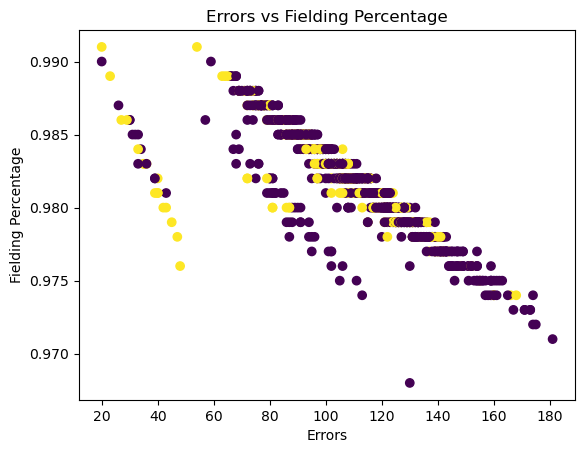

In [696]:
#Find Independent Variables
# Save df1["Fld%"]
plt.scatter(df1["E"], df1["Fld%"], c=df1["PLAYOFFS"])
plt.xlabel("Errors")
plt.ylabel("Fielding Percentage")
plt.title("Errors vs Fielding Percentage")


Text(0.5, 1.0, 'Chances vs Fielding Percentage')

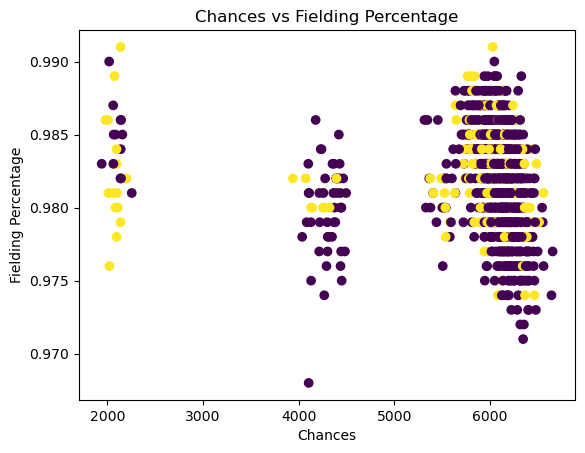

In [697]:
plt.scatter(df1["Ch"], df1["Fld%"], c=df1["PLAYOFFS"])
plt.xlabel("Chances")
plt.ylabel("Fielding Percentage")
plt.title("Chances vs Fielding Percentage")

Text(0.5, 1.0, 'Double Plays vs Fielding Percentage')

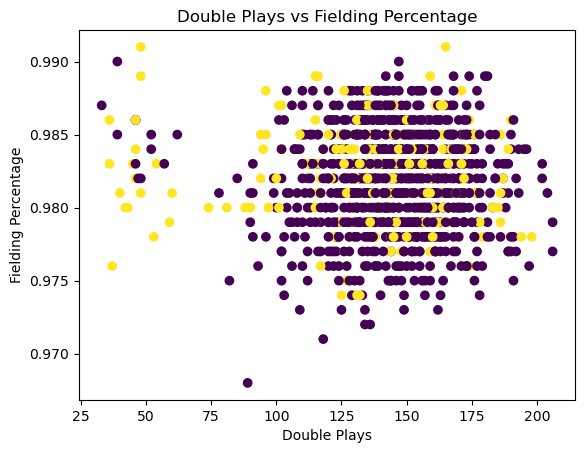

In [698]:
plt.scatter(df1["DP"], df1["Fld%"], c=df1["PLAYOFFS"])
plt.xlabel("Double Plays")
plt.ylabel("Fielding Percentage")
plt.title("Double Plays vs Fielding Percentage")

Text(0.5, 1.0, 'Total Runs Above Average vs Fielding Percentage')

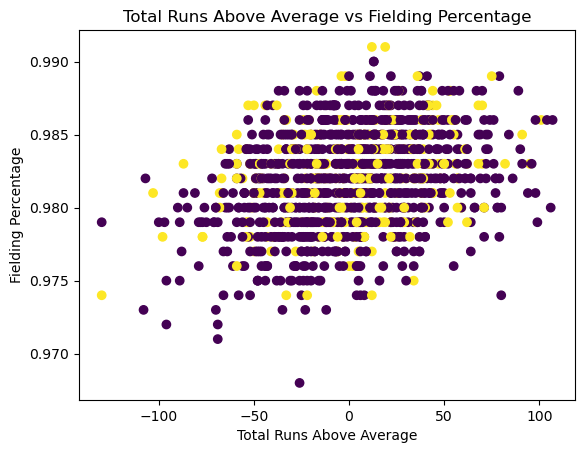

In [699]:
plt.scatter(df1["Rtot"], df1["Fld%"], c=df1["PLAYOFFS"])
plt.xlabel("Total Runs Above Average")
plt.ylabel("Fielding Percentage")
plt.title("Total Runs Above Average vs Fielding Percentage")

Text(0.5, 1.0, 'Range Factor vs Fielding Percentage')

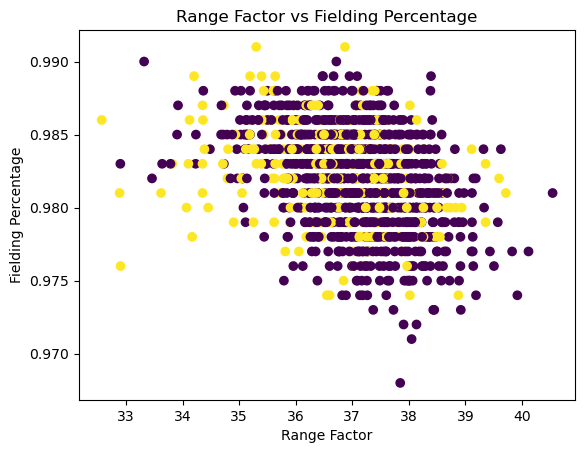

In [700]:
plt.scatter(df1["Range_Factor"], df1["Fld%"], c=df1["PLAYOFFS"])
plt.xlabel("Range Factor")
plt.ylabel("Fielding Percentage")
plt.title("Range Factor vs Fielding Percentage")

In [701]:
#We should apply either Logistic Regression or SVM to fit the data. 
LogReg=LogisticRegression(penalty='l2',intercept_scaling=6.2196752179914165
                          ,solver='sag',fit_intercept=False)
GNB=GaussianNB()
DT=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                          min_samples_leaf=1,ccp_alpha=0.0018018864722739482)
SVM=SVC(kernel='poly')
KNN=KNeighborsClassifier()


In [702]:
# #Get the notable columns. Eliminate outliers


In [703]:
inputs=df1[["Ch","DefEff","Fld%","Range_Factor"]]
inputs2=df2[["Ch","DefEff","Fld%","Range_Factor"]]

target=df1["PLAYOFFS"]
target2=df2["PLAYOFFS"]

In [704]:
# Fit the model(s)
# X_train,X_test,y_train,y_test=train_test_split(inputs,target,train_size=0.9)


#Fit the training set 
# model1=LogReg.fit(X_train,y_train)
# model2=SVM.fit(X_train,y_train)
# model3=KNN.fit(X_train,y_train)
# model4=GNB.fit(X_train,y_train)
# model5=DT.fit(X_train,y_train)



model1=LogReg.fit(inputs,target)
model2=SVM.fit(inputs,target)
model3=KNN.fit(inputs,target)
model4=GNB.fit(inputs,target)
model5=DT.fit(inputs,target)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [705]:
# Predict the testing values 
# result1=model1.predict(X_test)
# result2=model2.predict(X_test)
# result3=model3.predict(X_test)
# result4=model4.predict(X_test)    
# result5=model5.predict(X_test)



#Predict the values 
result1=model1.predict(inputs2)
result2=model2.predict(inputs2)
result3=model3.predict(inputs2)
result4=model4.predict(inputs2)    
result5=model5.predict(inputs2)

In [706]:
#Get Accuracy Score from the training and testing sets
# print("Log_Reg Score: ", accuracy_score(result1,y_test))
# print("SVM Score: ", accuracy_score(result2,y_test))
# print("GNB Score: ", accuracy_score(result4, y_test))

#Get the accuracy scores and see if we can improve the models 

# print("Log_Reg Score: ", accuracy_score(result1,target2))
# print("SVM Score: ", accuracy_score(result2,target2))


In [707]:
#Accuracy Score From the other testing sets 

print("Log_Reg Score: ", accuracy_score(result1,target2))
# print("SVM Score: ", accuracy_score(result2,target2))
# print("KNN_SCore: ", accuracy_score(result3,target2))
# print("GNB Score: ", accuracy_score(result4, target2))
print("DT Score: ", accuracy_score(result5,target2))


Log_Reg Score:  0.6
DT Score:  0.7


[Text(0.4157608695652174, 0.9375, 'X[3] <= 37.172\nentropy = 0.819\nsamples = 1227\nvalue = [914, 313]'),
 Text(0.1108695652173913, 0.8125, 'X[0] <= 2139.5\nentropy = 0.896\nsamples = 676\nvalue = [465, 211]'),
 Text(0.034782608695652174, 0.6875, 'X[2] <= 0.981\nentropy = 0.918\nsamples = 24\nvalue = [8, 16]'),
 Text(0.017391304347826087, 0.5625, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.05217391304347826, 0.5625, 'X[1] <= 0.685\nentropy = 1.0\nsamples = 16\nvalue = [8, 8]'),
 Text(0.034782608695652174, 0.4375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.06956521739130435, 0.4375, 'X[1] <= 0.699\nentropy = 0.961\nsamples = 13\nvalue = [5, 8]'),
 Text(0.05217391304347826, 0.3125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.08695652173913043, 0.3125, 'entropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.18695652173913044, 0.6875, 'X[0] <= 5369.0\nentropy = 0.88\nsamples = 652\nvalue = [457, 195]'),
 Text(0.12173913043478261, 0.5625, 'X[1] <= 0.722\ne

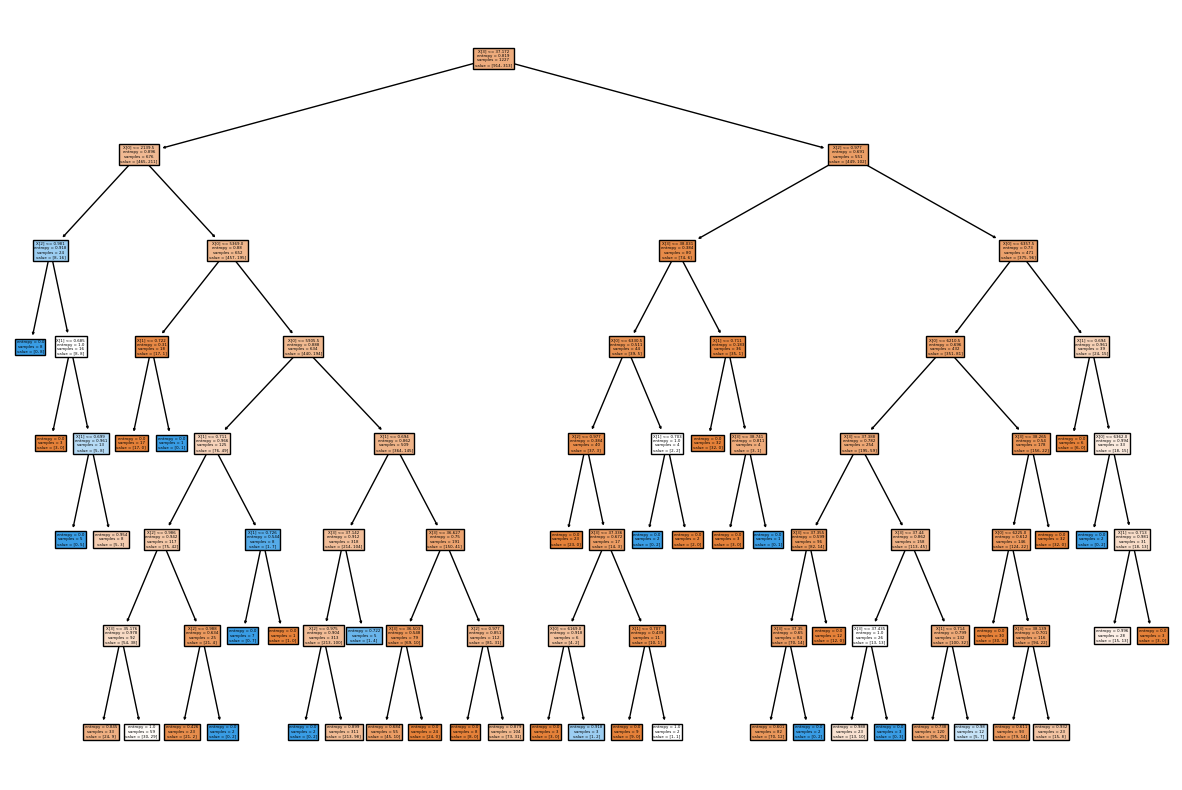

In [708]:
# We will use DT model to predict Fielding outcomes for each team. Plot the decision 
# tree first. 

# Plot The Decision Tree 
plt.figure(figsize=(15,10))
tree.plot_tree(model5,filled=True)

In [709]:
# Get cc_alpha score for the Decsion Tree model
path=model5.cost_complexity_pruning_path(inputs,target)
ccp_alphas,impurities=path.ccp_alphas,path.impurities 

alphas:  [0.         0.00092731 0.00131185 0.00178906 0.00181313 0.00199924
 0.00245172 0.002525   0.00262373 0.00267569 0.00269938 0.00282832
 0.00318449 0.00337582 0.00340853 0.00354402 0.00381844 0.00400266
 0.00422124 0.00430349 0.00492184 0.00532696 0.00776832 0.01545529]


 impurities:  [0.64601496 0.64694227 0.64825412 0.65183225 0.65727163 0.66127011
 0.66372183 0.66624683 0.68198922 0.68466491 0.68736429 0.6901926
 0.69337709 0.70012873 0.70694578 0.71048981 0.71430825 0.72631622
 0.7558649  0.76447188 0.76939372 0.7960285  0.80379682 0.81925211]


Text(0.5, 1.0, 'CCP Alphas vs Impuritites')

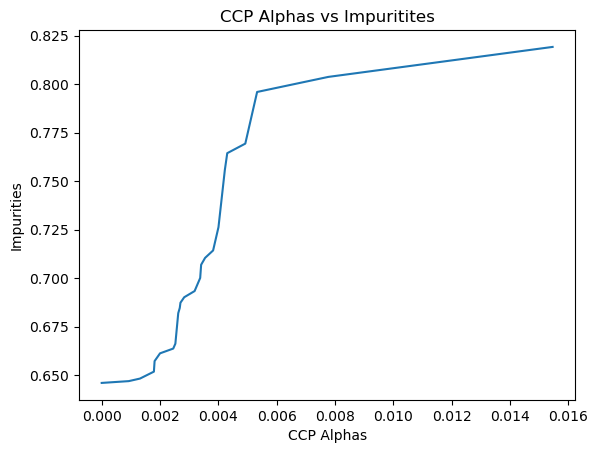

In [710]:
print("alphas: ",ccp_alphas)
print("\n\n impurities: ", impurities)

plt.plot(ccp_alphas, impurities,)
plt.xlabel("CCP Alphas")
plt.ylabel("Impurities")
plt.title("CCP Alphas vs Impuritites")

In [711]:
results_DT=[]
for ccp_alpha in ccp_alphas: 
    result_DT=DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    result_DT.fit(inputs,target)
    results_DT.append(result_DT)
    print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(result_DT.tree_.node_count, ccp_alpha))

Number of nodes in the last tree is: 671 with ccp_alpha: 0.0
Number of nodes in the last tree is: 417 with ccp_alpha: 0.0009273096430472173
Number of nodes in the last tree is: 171 with ccp_alpha: 0.0013118504274138643
Number of nodes in the last tree is: 39 with ccp_alpha: 0.0017890625613541924
Number of nodes in the last tree is: 39 with ccp_alpha: 0.0018131280597996138
Number of nodes in the last tree is: 35 with ccp_alpha: 0.001999239784469694
Number of nodes in the last tree is: 5 with ccp_alpha: 0.002451719880722958
Number of nodes in the last tree is: 5 with ccp_alpha: 0.0025250001920356507
Number of nodes in the last tree is: 5 with ccp_alpha: 0.0026237315457530446
Number of nodes in the last tree is: 5 with ccp_alpha: 0.002675690542295453
Number of nodes in the last tree is: 5 with ccp_alpha: 0.0026993767930807155
Number of nodes in the last tree is: 5 with ccp_alpha: 0.0028283150164105098
Number of nodes in the last tree is: 5 with ccp_alpha: 0.00318448504349203
Number of nod

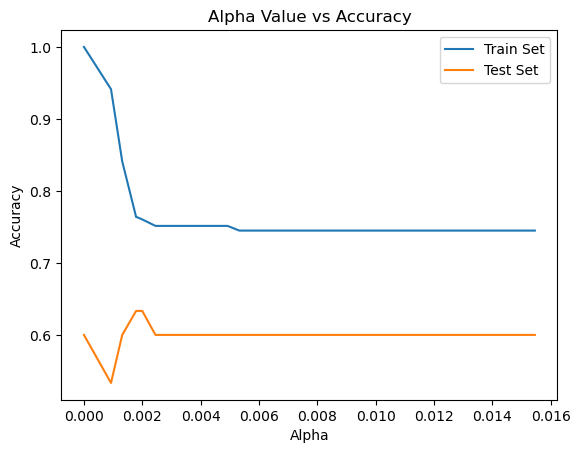

In [712]:
#Accuracy vs the ccp_alpha values 

train_scores=[result_DT.score(inputs,target) for result_DT in results_DT]
test_scores=[result_DT.score(inputs2,target2) for result_DT in results_DT]
tree_depths=[result_DT.tree_.max_depth for result_DT in results_DT]

fig,ax=plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Alpha Value vs Accuracy")

ax.plot(ccp_alphas, train_scores, label="Train Set")
ax.plot(ccp_alphas,test_scores, label="Test Set")
ax.legend()


Text(0.5, 1.0, 'CCP Alphas vs Max Total Depth')

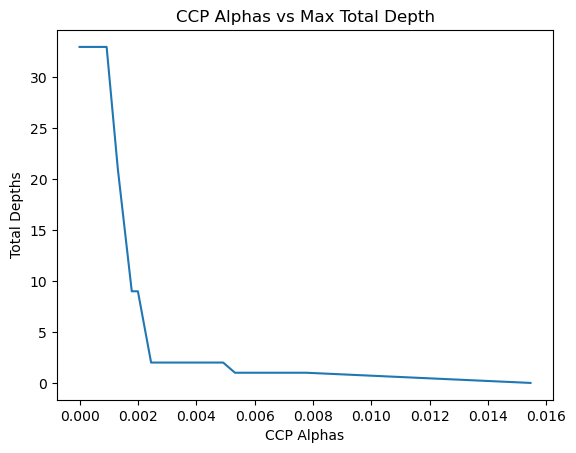

In [713]:
# Plot the total Depths with respect to the CCC Alpha parameter

plt.plot(ccp_alphas,tree_depths)
plt.xlabel("CCP Alphas")
plt.ylabel("Total Depths")
plt.title("CCP Alphas vs Max Total Depth")

Text(0.5, 1.0, 'CCP Alphas vs Accuracy Scores')

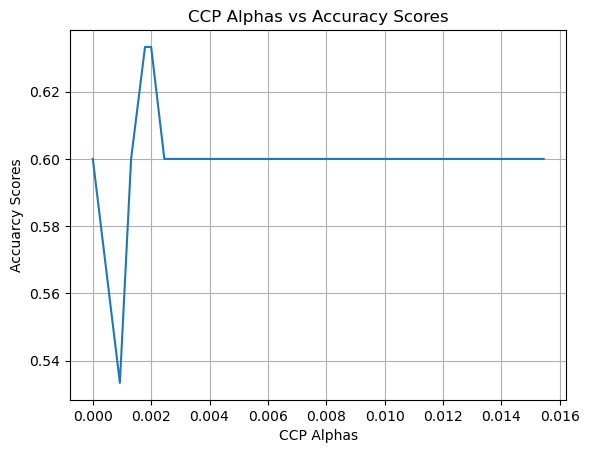

In [714]:
# Try to get a better accuracy score with the model 

acc_scores=[accuracy_score(target2,result_DT.predict(inputs2)) for result_DT in results_DT]

#Plot the Scores 
plt.plot(ccp_alphas,acc_scores)
plt.grid()
plt.xlabel("CCP Alphas")
plt.ylabel("Accuarcy Scores")
plt.title("CCP Alphas vs Accuracy Scores")